In [94]:
### This notebook is used to perform Network Analysis

In [95]:
# Import Libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.utils import from_networkx
from torch_geometric.nn import GCNConv
from networkx.algorithms.community import greedy_modularity_communities

In [96]:
df = pd.read_csv('sample.csv')

df.head()

,Unnamed: 0,created_at,description,entities,id,location,name,pinned_tweet_id,profile_image_url,protected,...,protected_True,protected_False,url_True,url_False,verified_True,verified_False,withheld_True,withheld_False,bot_True,bot_False
0,0,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https...,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",u1217628182611927040,"Cambridge, MA",Boaz Barak,NaN,https://pbs.twimg.com/profile_images/125226236...,False,...,0,1,1,0,0,1,1,0,0,1
1,1,2014-07-02 17:56:46+00:00,creative _,NaN,u2664730894,🎈,olawale 💨,NaN,https://pbs.twimg.com/profile_images/147837638...,False,...,0,1,0,1,0,1,1,0,0,1
2,2,2020-05-30 12:10:45+00:00,👽,NaN,u1266703520205549568,NaN,panagiota_.b,NaN,https://pbs.twimg.com/profile_images/142608606...,False,...,0,1,0,1,0,1,1,0,0,1
3,3,2019-01-26 13:52:49+00:00,mama to maya. ABIM research pathway fellow @UV...,"{'description': {'mentions': [{'start': 43, 'e...",u1089159225148882949,"Charlottesville, VA","Jacqueline Hodges, MD MPH",NaN,https://pbs.twimg.com/profile_images/130229171...,False,...,0,1,0,1,0,1,1,0,0,1
4,4,2009-04-30 19:01:42+00:00,Father / SWT Alumnus / Longhorn Fan,NaN,u36741729,United States,Matthew Stubblefield,NaN,https://pbs.twimg.com/profile_images/145808462...,True,...,1,0,0,1,0,1,1,0,1,0


In [97]:
df = pd.read_csv('sample_edge.csv')

df.head()

,Unnamed: 0,source_id,relation,target_id
0,0,u980749991491682304,followers,u1480979504696864775
1,1,u105387876,following,u402576793
2,2,u148520716,following,u59653593
3,3,u1276438425457967110,following,u1389155636693381120
4,4,u1445432327367237638,following,u848348952084828160


In [98]:
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['source_id'], row['target_id'], relation=row['relation'])

# Verify the graph has been created
print("Graph loaded successfully with nodes:", G.nodes())
print("Edges with attributes:", G.edges(data=True))

Graph loaded successfully with nodes: ['u980749991491682304', 'u1480979504696864775', 'u105387876', 'u402576793', 'u148520716', 'u59653593', 'u1276438425457967110', 'u1389155636693381120', 'u1445432327367237638', 'u848348952084828160', 'u850507814023942144', 'u1078324065532764166', 'u781676758932262912', 'u3185512585', 'u19376807', 'u246495872', 'u66780587', 'u2704715387', 'u1483909830159085571', 'u4311016395', 'u1281203928', 'u3254857712', 'u876448351268380672', 'u1108086217088724992', 'u213169506', 'u2750548111', 'u25030647', 'u33746386', 'u22730752', 'u1093530573140824064', 'u103865085', 'u1295463204924067840', 'u753165526566899713', 'u1484420078', 'u243286973', 'u41405898', 'u81635029', 'u905563470707515394', 'u3225863298', 'u742143', 'u114820052', 'u18876842', 'u75975034', 'u2933188356', 'u443288053', 'u70615294', 'u30364057', 'u892219807', 'u16834046', 'u37666984', 'u44371088', 'u14320571', 'u834860341553041408', 'u23092822', 'u1924484352', 'u3408319427', 'u5932762', 'u1005804188

In [99]:
print('node list: {}'.format(G.nodes()))
print('edge list: {}'.format(G.edges(data = True)))

node list: ['u980749991491682304', 'u1480979504696864775', 'u105387876', 'u402576793', 'u148520716', 'u59653593', 'u1276438425457967110', 'u1389155636693381120', 'u1445432327367237638', 'u848348952084828160', 'u850507814023942144', 'u1078324065532764166', 'u781676758932262912', 'u3185512585', 'u19376807', 'u246495872', 'u66780587', 'u2704715387', 'u1483909830159085571', 'u4311016395', 'u1281203928', 'u3254857712', 'u876448351268380672', 'u1108086217088724992', 'u213169506', 'u2750548111', 'u25030647', 'u33746386', 'u22730752', 'u1093530573140824064', 'u103865085', 'u1295463204924067840', 'u753165526566899713', 'u1484420078', 'u243286973', 'u41405898', 'u81635029', 'u905563470707515394', 'u3225863298', 'u742143', 'u114820052', 'u18876842', 'u75975034', 'u2933188356', 'u443288053', 'u70615294', 'u30364057', 'u892219807', 'u16834046', 'u37666984', 'u44371088', 'u14320571', 'u834860341553041408', 'u23092822', 'u1924484352', 'u3408319427', 'u5932762', 'u1005804188238934017', 'u521747968', '

In [100]:
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
print('number of nodes: {}, number of edges: {}'.format(num_nodes, num_edges))

number of nodes: 1846, number of edges: 1000


In [101]:
G.nodes

NodeView(('u980749991491682304', 'u1480979504696864775', 'u105387876', 'u402576793', 'u148520716', 'u59653593', 'u1276438425457967110', 'u1389155636693381120', 'u1445432327367237638', 'u848348952084828160', 'u850507814023942144', 'u1078324065532764166', 'u781676758932262912', 'u3185512585', 'u19376807', 'u246495872', 'u66780587', 'u2704715387', 'u1483909830159085571', 'u4311016395', 'u1281203928', 'u3254857712', 'u876448351268380672', 'u1108086217088724992', 'u213169506', 'u2750548111', 'u25030647', 'u33746386', 'u22730752', 'u1093530573140824064', 'u103865085', 'u1295463204924067840', 'u753165526566899713', 'u1484420078', 'u243286973', 'u41405898', 'u81635029', 'u905563470707515394', 'u3225863298', 'u742143', 'u114820052', 'u18876842', 'u75975034', 'u2933188356', 'u443288053', 'u70615294', 'u30364057', 'u892219807', 'u16834046', 'u37666984', 'u44371088', 'u14320571', 'u834860341553041408', 'u23092822', 'u1924484352', 'u3408319427', 'u5932762', 'u1005804188238934017', 'u521747968', 'u5

In [102]:
# BFS and DFS
start_node = 'u980749991491682304'

# Get the BFS edges
bfs_edges = list(nx.bfs_edges(G, source=start_node))

print("BFS Traversal Edges:", bfs_edges)

BFS Traversal Edges: [('u980749991491682304', 'u1480979504696864775')]


In [103]:
dfs_edges = list(nx.dfs_edges(G, source=start_node))

print("DFS Traversal Edges:", dfs_edges)

DFS Traversal Edges: [('u980749991491682304', 'u1480979504696864775')]


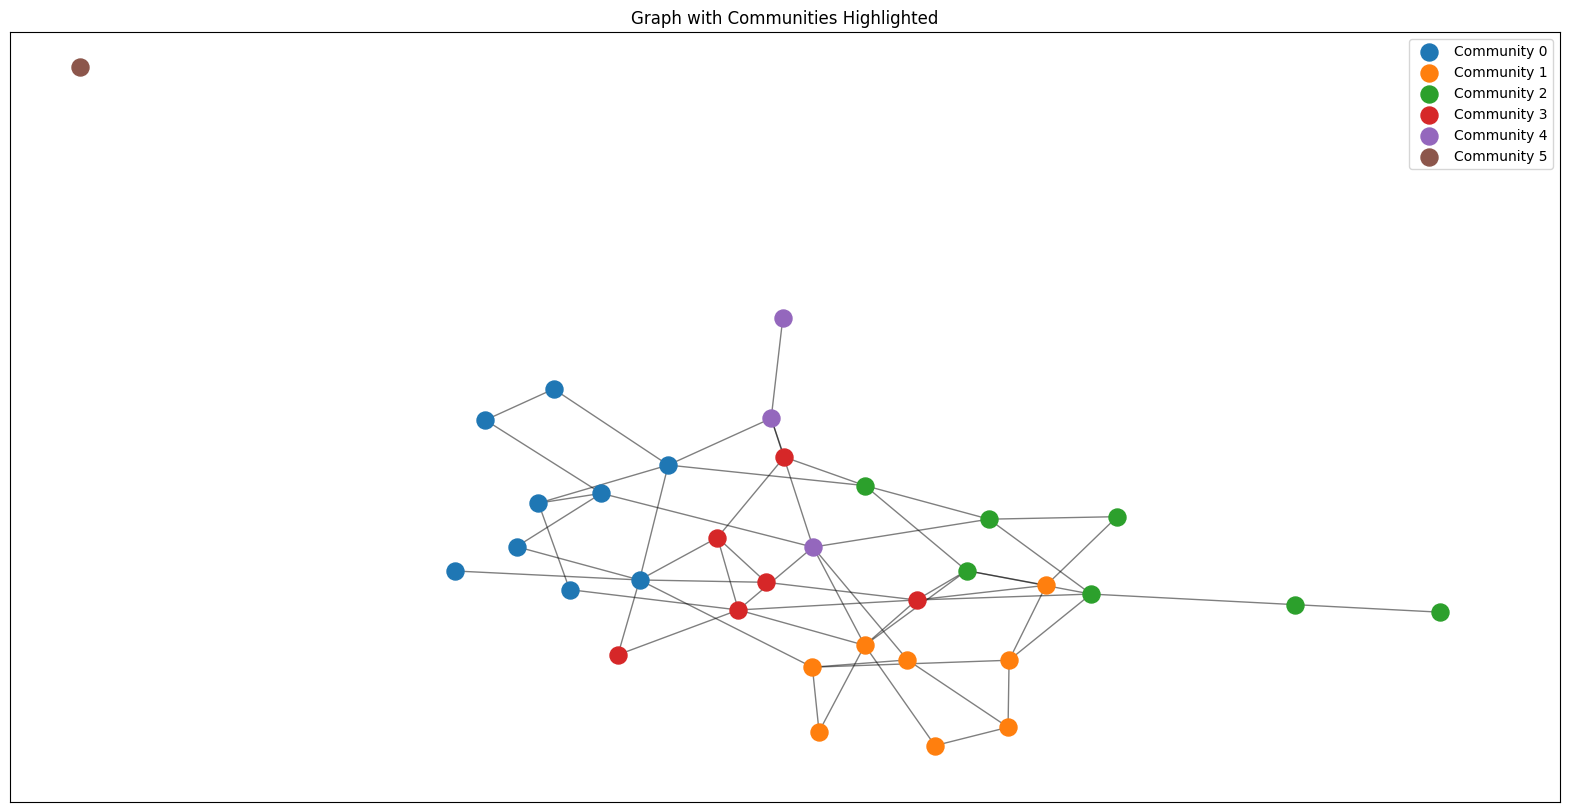

In [104]:
# Graph Community Detection

G = nx.erdos_renyi_graph(34, 0.1)  

communities = list(greedy_modularity_communities(G))

community_map = {}
for community_id, community_nodes in enumerate(communities):
    for node in community_nodes:
        community_map[node] = community_id

plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=42)  

unique_communities = set(community_map.values())

colors = plt.get_cmap('tab10')

for community_id in unique_communities:
    community_nodes = [node for node in G.nodes if community_map[node] == community_id]
    nx.draw_networkx_nodes(G, pos, nodelist=community_nodes, node_size=150, 
                           node_color=[colors(community_id % 10)], label=f"Community {community_id}")

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Graph with Communities Highlighted")
plt.legend()
plt.show()


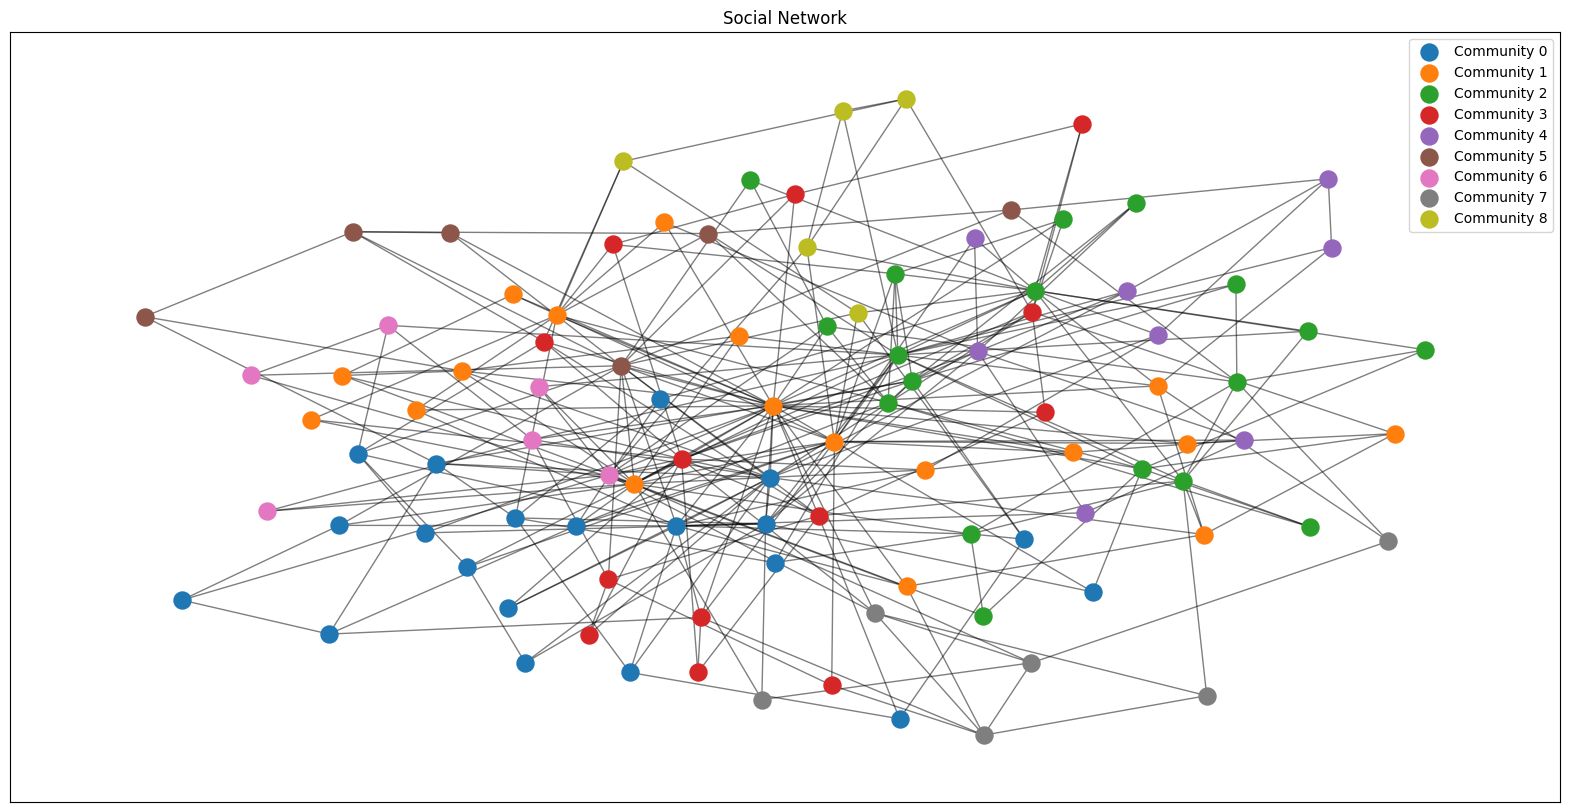

In [105]:
G = nx.barabasi_albert_graph(100, 3)  

communities = list(greedy_modularity_communities(G))

community_map = {}
for community_id, community_nodes in enumerate(communities):
    for node in community_nodes:
        community_map[node] = community_id

plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=42)  

unique_communities = set(community_map.values())

colors = plt.get_cmap('tab10')

for community_id in unique_communities:
    community_nodes = [node for node in G.nodes if community_map[node] == community_id]
    nx.draw_networkx_nodes(G, pos, nodelist=community_nodes, node_size=150, 
                           node_color=[colors(community_id % 10)], label=f"Community {community_id}")
                           
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Social Network")
plt.legend()
plt.show()


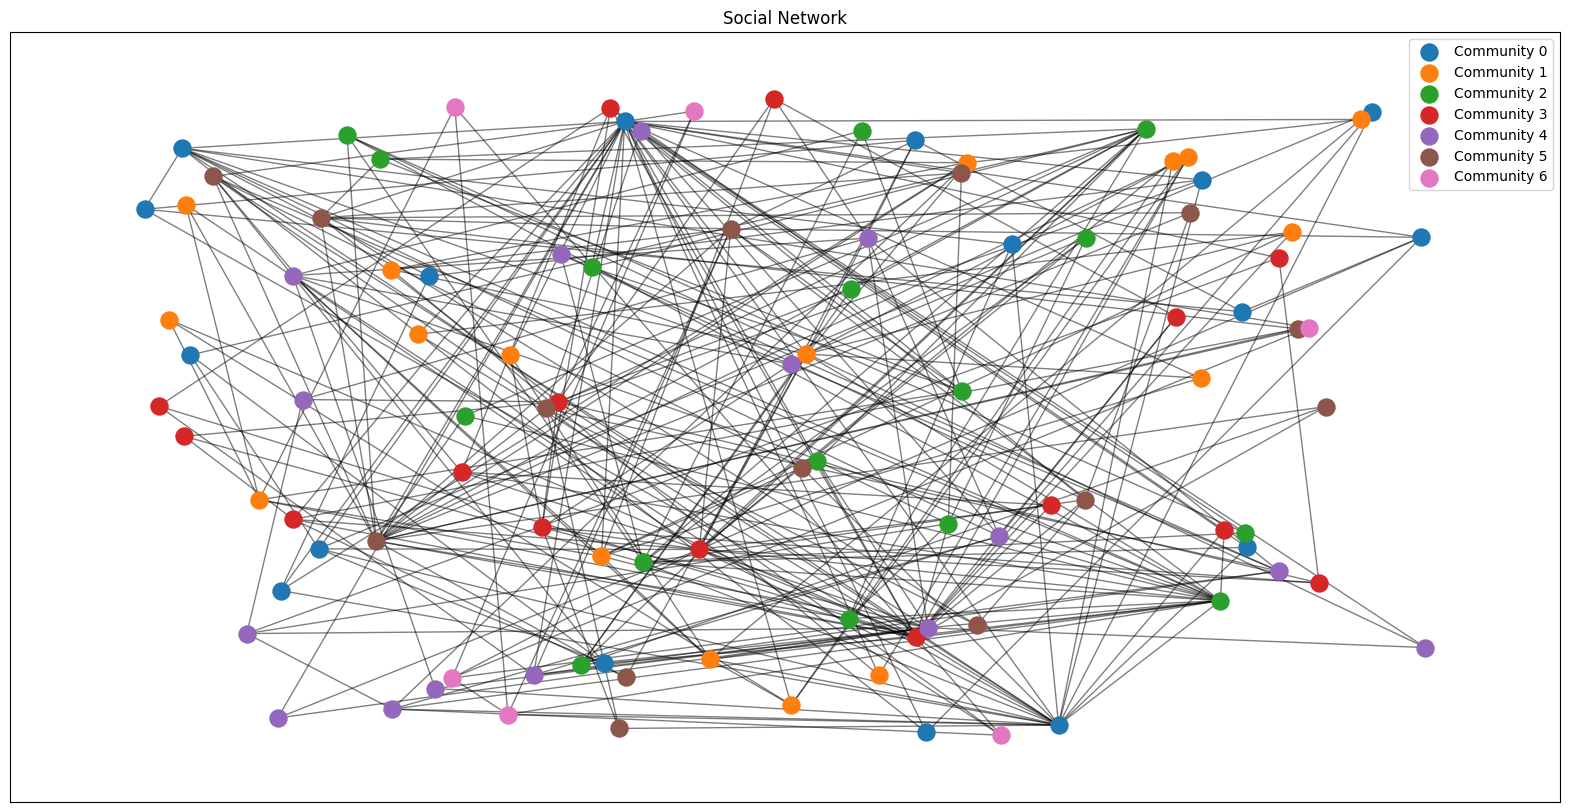

In [106]:
G = nx.barabasi_albert_graph(100, 3)  

communities = list(greedy_modularity_communities(G))

community_map = {}
for community_id, community_nodes in enumerate(communities):
    for node in community_nodes:
        community_map[node] = community_id

np.random.seed(42)
pos_3d = {node: np.random.rand(3) for node in G.nodes}

pos_2d = {node: pos[:2] for node, pos in pos_3d.items()}

plt.figure(figsize=(20, 10))

unique_communities = set(community_map.values())

colors = plt.get_cmap('tab10')

for community_id in unique_communities:
    community_nodes = [node for node in G.nodes if community_map[node] == community_id]
    node_positions = np.array([pos_2d[node] for node in community_nodes])
    nx.draw_networkx_nodes(G, pos=pos_2d, nodelist=community_nodes, node_size=150, 
                           node_color=[colors(community_id % 10)], label=f"Community {community_id}")

nx.draw_networkx_edges(G, pos_2d, alpha=0.5)
plt.title("Social Network")
plt.legend()
plt.show()


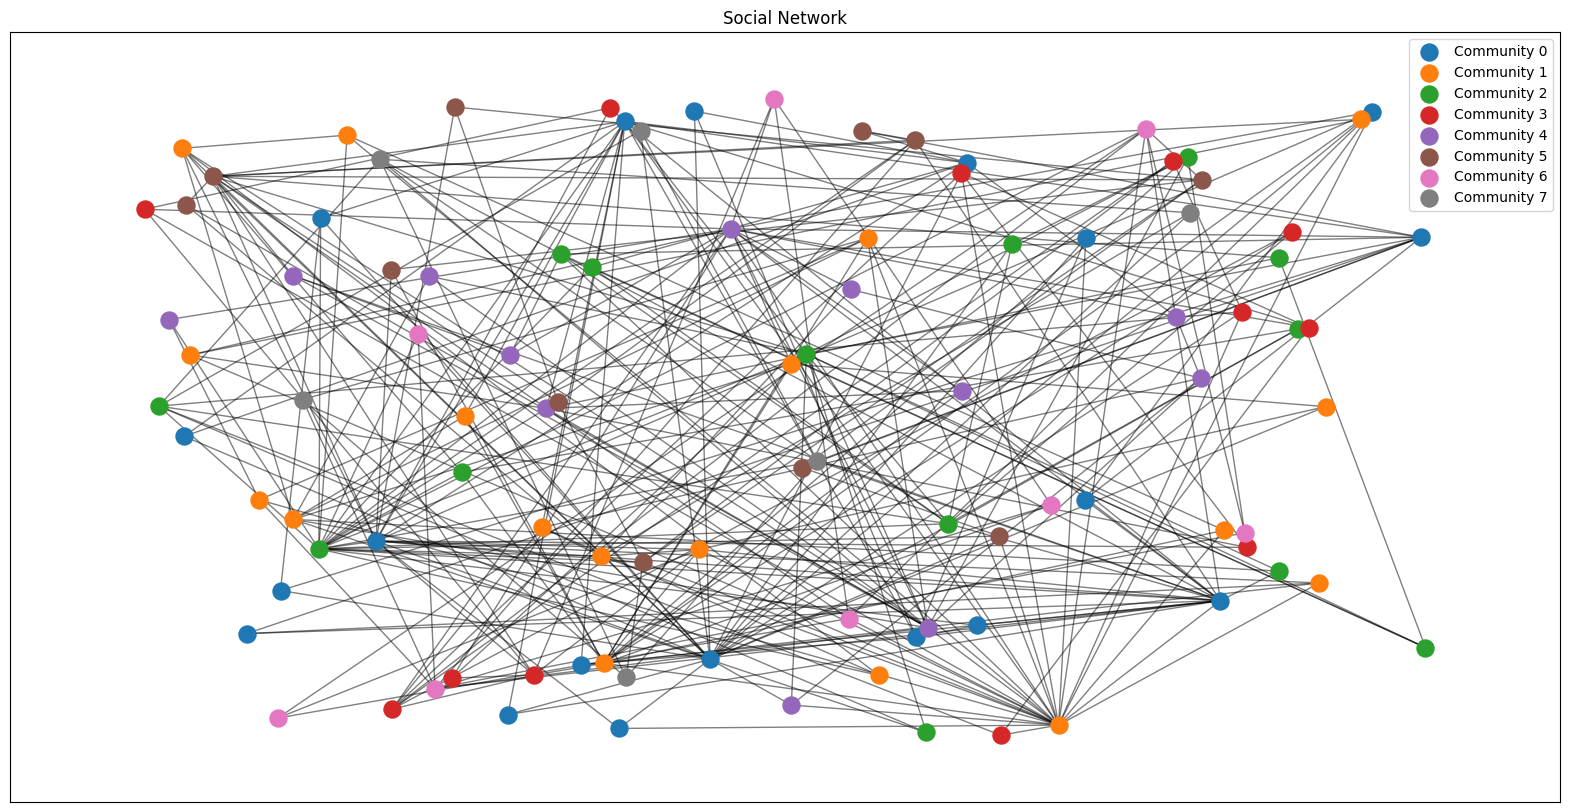

Shortest path between node 0 and node 10: [0, 9, 10]
Epoch 0, Loss: 2.0844383239746094
Epoch 10, Loss: 1.9385524988174438
Epoch 20, Loss: 1.7116514444351196
Epoch 30, Loss: 1.4191042184829712
Epoch 40, Loss: 1.0813570022583008
Epoch 50, Loss: 0.7602403163909912
Epoch 60, Loss: 0.506108283996582
Epoch 70, Loss: 0.32870015501976013
Epoch 80, Loss: 0.21517044305801392
Epoch 90, Loss: 0.14608639478683472
Accuracy: 0.8800


In [107]:
G = nx.barabasi_albert_graph(100, 3)  

communities = list(greedy_modularity_communities(G))

community_map = {}
for community_id, community_nodes in enumerate(communities):
    for node in community_nodes:
        community_map[node] = community_id

np.random.seed(42)
pos_3d = {node: np.random.rand(3) for node in G.nodes}

pos_2d = {node: pos[:2] for node, pos in pos_3d.items()}

plt.figure(figsize=(20, 10))

unique_communities = set(community_map.values())

colors = plt.get_cmap('tab10')

for community_id in unique_communities:
    community_nodes = [node for node in G.nodes if community_map[node] == community_id]
    node_positions = np.array([pos_2d[node] for node in community_nodes])
    nx.draw_networkx_nodes(G, pos=pos_2d, nodelist=community_nodes, node_size=150, 
                           node_color=[colors(community_id % 10)], label=f"Community {community_id}")

nx.draw_networkx_edges(G, pos_2d, alpha=0.5)
plt.title("Social Network")
plt.legend()
plt.show()

source, target = 0, 10  
shortest_path = nx.shortest_path(G, source=source, target=target)
print(f"Shortest path between node {source} and node {target}: {shortest_path}")

data = from_networkx(G)

data.x = torch.eye(data.num_nodes)  
data.y = torch.tensor([community_map[node] for node in range(data.num_nodes)])  

class GCN(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, 16)
        self.conv2 = GCNConv(16, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

model = GCN(in_channels=data.num_features, out_channels=len(unique_communities))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

data.train_mask = torch.rand(data.num_nodes) < 0.8
data.test_mask = ~data.train_mask

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Evaluation
model.eval()
_, pred = model(data).max(dim=1)
correct = int((pred[data.test_mask] == data.y[data.test_mask]).sum())
acc = correct / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')
